<a href="https://colab.research.google.com/github/zkazemi/Prediction-from-Image/blob/main/RegressionWithCNN_fus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/zkazemi/Prediction-from-Image.git

Cloning into 'Prediction-from-Image'...
remote: Enumerating objects: 1030, done.
remote: Counting objects: 100% (1030/1030), done.
remote: Compressing objects: 100% (1028/1028), done.
remote: Total 1030 (delta 0), reused 1027 (delta 0), pack-reused 0
Receiving objects: 100% (1030/1030), 13.59 MiB | 17.43 MiB/s, done.


In [2]:
!pip install ktrain

     |████████████████████████████████| 25.3 MB 64 kB/s 
     |████████████████████████████████| 6.8 MB 38.6 MB/s 
     |████████████████████████████████| 981 kB 29.5 MB/s 
     |████████████████████████████████| 263 kB 40.3 MB/s 
     |████████████████████████████████| 2.8 MB 29.8 MB/s 
     |████████████████████████████████| 1.2 MB 35.4 MB/s 
     |████████████████████████████████| 468 kB 31.8 MB/s 
     |████████████████████████████████| 56 kB 4.5 MB/s 
     |████████████████████████████████| 3.3 MB 29.9 MB/s 
     |████████████████████████████████| 895 kB 30.7 MB/s 
     |████████████████████████████████| 596 kB 33.8 MB/s 
  Created wheel for ktrain: filename=ktrain-0.28.2-py3-none-any.whl size=25290606 sha256=2cce245f7c72dcef6aa2ae61dd32fad9718a0fbdb5615f3663d1b4f67195e2ad
  Stored in directory: /root/.cache/pip/wheels/df/2b/04/7c821b51e637ec480060989b5030d0c4cce16efe0d67bff94b
  Created wheel for seqeval: filename=seqeval-0.0.19-py3-none-any.whl size=9929 sha256=729179512f5c57c98

In [3]:
%matplotlib inline
import os
import ktrain
from ktrain import vision as vis

In [4]:
import re
pattern = r'([^/]+)_\d+\.\d+.jpg$'

p = re.compile(pattern)
r = p.search('343.2322_210.5398.jpg')
print(r.group(1))


343.2322


In [5]:
DATADIR = '/content/Prediction-from-Image/InputImages'

In [6]:
(train_data, test_data, preproc) = vis.images_from_fname(DATADIR, pattern = pattern, is_regression=True, random_state=42)

['label']
           label
1010  348.655701
299   354.838104
548   347.657288
1002  356.086914
929   343.548309
['label']
          label
525  344.787415
357  355.905701
444  358.304688
31   345.618103
618  358.224609
Found 921 validated image filenames.
Found 103 validated image filenames.


/usr/local/lib/python3.7/dist-packages/ktrain/utils.py:708: UserWarning: is_regression=True was supplied but targets are strings - casting to floats
  warnings.warn('is_regression=True was supplied but targets are strings - casting to floats')
/usr/local/lib/python3.7/dist-packages/ktrain/utils.py:607: UserWarning: Task is being treated as REGRESSION because either class_names argument was not supplied or is_regression=True. If this is incorrect, change accordingly.
  'either class_names argument was not supplied or is_regression=True. ' + \
/usr/local/lib/python3.7/dist-packages/ktrain/utils.py:708: UserWarning: is_regression=True was supplied but targets are strings - casting to floats
  warnings.warn('is_regression=True was supplied but targets are strings - casting to floats')


In [7]:
vis.images_from_fname??


In [8]:
vis.print_image_regression_models()

pretrained_resnet50: 50-layer Residual Network (pretrained on ImageNet)
resnet50: 50-layer Resididual Network (randomly initialized)
pretrained_mobilenet: MobileNet Neural Network (pretrained on ImageNet)
mobilenet: MobileNet Neural Network (randomly initialized)
pretrained_inception: Inception Version 3  (pretrained on ImageNet)
inception: Inception Version 3 (randomly initialized)
wrn22: 22-layer Wide Residual Network (randomly initialized)
default_cnn: a default LeNet-like Convolutional Neural Network


In [9]:
model = vis.image_regression_model('resnet50', train_data=train_data, val_data=test_data)

Is Multi-Label? False
Is Regression? True
resnet50 model created.


In [10]:
vis.image_regression_model??

In [11]:
learner = ktrain.get_learner(model=model, train_data=train_data, val_data=test_data, batch_size=50)

In [ ]:
ktrain.get_learner??

In [12]:
history = learner.fit_onecycle(0.00001, 30)



begin training using onecycle policy with max lr of 1e-05...
Epoch 1/30
19/19 [==============================] - 47s 718ms/step - loss: 130515.8750 - mae: 361.0306 - val_loss: 125193.3516 - val_mae: 353.7853
Epoch 2/30
19/19 [==============================] - 10s 516ms/step - loss: 119640.1328 - mae: 345.5966 - val_loss: 112406.0938 - val_mae: 335.2258
Epoch 3/30
19/19 [==============================] - 10s 513ms/step - loss: 105387.5000 - mae: 324.3228 - val_loss: 96913.6953 - val_mae: 311.2607
Epoch 4/30
19/19 [==============================] - 10s 508ms/step - loss: 89103.0938 - mae: 298.0893 - val_loss: 79775.3281 - val_mae: 282.3896
Epoch 5/30
19/19 [==============================] - 10s 508ms/step - loss: 71364.7656 - mae: 266.6565 - val_loss: 62433.8867 - val_mae: 249.8023
Epoch 6/30
19/19 [==============================] - 10s 515ms/step - loss: 54698.3516 - mae: 233.3378 - val_loss: 46233.0352 - val_mae: 214.9391
Epoch 7/30
19/19 [==============================] - 10s 511ms/

In [13]:
history.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae', 'lr', 'iterations', 'momentum'])

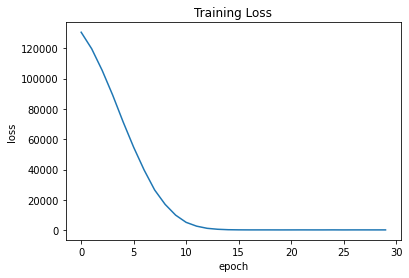

In [14]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.title('Training Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

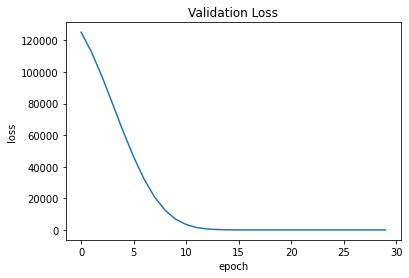

In [15]:
plt.plot(history.history['val_loss'])
plt.title('Validation Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [ ]:
learner.freeze(15)

learner.fit_onecycle(0.001, 6)

In [16]:
predictor = ktrain.get_predictor(learner.model, preproc)

In [17]:
test_data.filenames[50:100]

['350.0483_212.0603.jpg',
 '359.3112_188.646.jpg',
 '345.8751_179.0623.jpg',
 '346.4512_220.336.jpg',
 '344.6808_282.2765.jpg',
 '352.0501_251.988.jpg',
 '356.7374_187.5386.jpg',
 '349.6955_163.0286.jpg',
 '347.0562_261.1113.jpg',
 '358.9904_177.8156.jpg',
 '348.3127_286.1518.jpg',
 '345.4153_145.4921.jpg',
 '344.3273_124.3657.jpg',
 '349.7562_143.5251.jpg',
 '352.0423_223.6046.jpg',
 '355.1949_177.1358.jpg',
 '357.8634_250.9355.jpg',
 '343.4894_170.7163.jpg',
 '354.2964_304.0657.jpg',
 '344.5864_274.0888.jpg',
 '347.2627_292.0572.jpg',
 '353.0311_203.7536.jpg',
 '357.6149_134.6812.jpg',
 '358.5393_155.5622.jpg',
 '345.4109_124.8476.jpg',
 '343.8355_160.3266.jpg',
 '358.2491_252.4268.jpg',
 '343.1168_301.3336.jpg',
 '357.9433_201.726.jpg',
 '349.4354_157.2079.jpg',
 '343.7586_130.3827.jpg',
 '358.5274_144.9672.jpg',
 '359.1429_125.3914.jpg',
 '345.2846_127.0375.jpg',
 '343.1046_181.2099.jpg',
 '358.2672_179.9598.jpg',
 '345.5262_142.8362.jpg',
 '351.3387_140.215.jpg',
 '344.6939_187.97

In [18]:
def show_prediction(fname):
    fname = DATADIR + '/' + fname
    pred  = (predictor.predict_filename(fname)[0])
    actual = float(p.search(fname).group(1))
    vis.show_image(fname)
    print("predicted: %s | Actual: %s" %(pred, actual))

predicted: 349.10806 | Actual: 343.1168


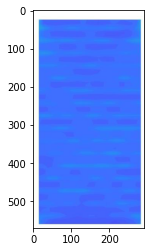

In [19]:
show_prediction('343.1168_301.3336.jpg')